In [17]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,root_mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv(r'..\..\data\processed\Merch_ML.csv',index_col='Order_ID')
df.head()

,Order_Date,Buyer_Age,Sales_Price,Shipping_Charges,Sales_per_Unit,Quantity,Total_Sales,Rating,Product_ID,Order_Location,International_Shipping,Buyer_Gender,Product_Category_Clothing,Product_Category_Ornaments,Product_Category_Other
Order_ID,,,,,,,,,,,,,,,
189440,2024-07-21,30,100,0,100,1,100,4,0,15,0,1,1.0,0.0,0.0
187385,2024-07-20,32,100,0,100,1,100,3,0,6,0,1,1.0,0.0,0.0
181844,2024-07-21,26,9,40,49,1,49,2,1,1,1,0,0.0,0.0,1.0
197934,2024-08-19,28,9,0,9,2,18,3,1,18,0,1,0.0,0.0,1.0
122470,2024-01-06,19,10,0,10,3,30,5,2,11,0,0,0.0,0.0,1.0


In [12]:
df['Total_Sales'] = np.log1p(df['Total_Sales'])

In [ ]:
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_absolute_error

mae_scores = {}
mape_scores = {}

for product in df['Product_ID'].unique():
    df_product = df[df['Product_ID'] == product][['Order_Date', 'Total_Sales']].rename(columns={'Order_Date': 'ds', 'Total_Sales': 'y'})
    
    # 🔹 Aplicar log1p para mayor estabilidad
    df_product['y'] = np.log1p(df_product['y'])

    # Crear y entrenar Prophet con estacionalidad ajustada
    model = Prophet(
        changepoint_prior_scale=0.1,
        yearly_seasonality=True,
        seasonality_prior_scale=20
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=10)  # Agregar estacionalidad manual
    model.fit(df_product)

    # Hacer predicción en las mismas fechas reales
    future = df_product[['ds']]
    forecast = model.predict(future)

    # Obtener valores reales y predicciones
    y_true = df_product['y'].values
    y_pred = forecast['yhat'].values

    # 🔹 Evaluar en escala log antes de desescalar
    mae_log = mean_absolute_error(y_true, y_pred)
    mape_log = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1))) * 100

    print(f'Producto {product} - MAE log: {mae_log:.2f}, MAPE log: {mape_log:.2f}%')

    # 🔹 Deshacer log1p
    y_true_original = np.expm1(y_true)
    y_pred_original = np.expm1(y_pred)

    # Calcular errores en escala original
    mae = mean_absolute_error(y_true_original, y_pred_original)
    mae_scores[product] = mae

    mape = np.mean(np.abs((y_true_original - y_pred_original) / np.maximum(y_true_original, 1))) * 100
    mape_scores[product] = mape

    print(f'Producto {product} - MAE real: {mae:.2f}, MAPE real: {mape:.2f}%')

print("\nResumen de errores:")
for product in mae_scores.keys():
    print(f'Producto {product} → MAE: {mae_scores[product]:.2f}, MAPE: {mape_scores[product]:.2f}%')



13:31:37 - cmdstanpy - INFO - Chain [1] start processing
13:31:37 - cmdstanpy - INFO - Chain [1] done processing
13:31:37 - cmdstanpy - INFO - Chain [1] start processing


Producto 0 - MAE log: 0.08, MAPE log: 4.40%
Producto 0 - MAE real: 0.50, MAPE real: 9.48%


13:31:38 - cmdstanpy - INFO - Chain [1] done processing
13:31:38 - cmdstanpy - INFO - Chain [1] start processing


Producto 1 - MAE log: 0.19, MAPE log: 13.74%
Producto 1 - MAE real: 0.81, MAPE real: 25.58%


13:31:38 - cmdstanpy - INFO - Chain [1] done processing
13:31:38 - cmdstanpy - INFO - Chain [1] start processing


Producto 2 - MAE log: 0.19, MAPE log: 13.41%
Producto 2 - MAE real: 0.83, MAPE real: 25.36%


13:31:38 - cmdstanpy - INFO - Chain [1] done processing
13:31:38 - cmdstanpy - INFO - Chain [1] start processing


Producto 3 - MAE log: 0.07, MAPE log: 3.66%
Producto 3 - MAE real: 0.42, MAPE real: 7.94%


13:31:38 - cmdstanpy - INFO - Chain [1] done processing
13:31:39 - cmdstanpy - INFO - Chain [1] start processing


Producto 4 - MAE log: 0.11, MAPE log: 6.73%
Producto 4 - MAE real: 0.57, MAPE real: 13.63%


13:31:39 - cmdstanpy - INFO - Chain [1] done processing
13:31:39 - cmdstanpy - INFO - Chain [1] start processing


Producto 5 - MAE log: 0.08, MAPE log: 4.67%
Producto 5 - MAE real: 0.47, MAPE real: 9.80%


13:31:39 - cmdstanpy - INFO - Chain [1] done processing
13:31:40 - cmdstanpy - INFO - Chain [1] start processing


Producto 6 - MAE log: 0.07, MAPE log: 3.93%
Producto 6 - MAE real: 0.47, MAPE real: 8.59%


13:31:40 - cmdstanpy - INFO - Chain [1] done processing
13:31:40 - cmdstanpy - INFO - Chain [1] start processing


Producto 7 - MAE log: 0.08, MAPE log: 4.15%
Producto 7 - MAE real: 0.46, MAPE real: 8.92%


13:31:40 - cmdstanpy - INFO - Chain [1] done processing
13:31:40 - cmdstanpy - INFO - Chain [1] start processing
13:31:40 - cmdstanpy - INFO - Chain [1] done processing


Producto 8 - MAE log: 0.16, MAPE log: 10.44%
Producto 8 - MAE real: 0.72, MAPE real: 20.17%


13:31:40 - cmdstanpy - INFO - Chain [1] start processing


Producto 9 - MAE log: 0.09, MAPE log: 5.50%
Producto 9 - MAE real: 0.51, MAPE real: 11.30%


13:31:41 - cmdstanpy - INFO - Chain [1] done processing
13:31:41 - cmdstanpy - INFO - Chain [1] start processing


Producto 10 - MAE log: 0.10, MAPE log: 5.75%
Producto 10 - MAE real: 0.54, MAPE real: 11.95%


13:31:41 - cmdstanpy - INFO - Chain [1] done processing
13:31:41 - cmdstanpy - INFO - Chain [1] start processing
13:31:41 - cmdstanpy - INFO - Chain [1] done processing


Producto 11 - MAE log: 0.14, MAPE log: 8.92%
Producto 11 - MAE real: 0.67, MAPE real: 17.55%
Producto 12 - MAE log: 0.15, MAPE log: 9.27%
Producto 12 - MAE real: 0.72, MAPE real: 18.40%

Resumen de errores:
Producto 0 → MAE: 0.50, MAPE: 9.48%
Producto 1 → MAE: 0.81, MAPE: 25.58%
Producto 2 → MAE: 0.83, MAPE: 25.36%
Producto 3 → MAE: 0.42, MAPE: 7.94%
Producto 4 → MAE: 0.57, MAPE: 13.63%
Producto 5 → MAE: 0.47, MAPE: 9.80%
Producto 6 → MAE: 0.47, MAPE: 8.59%
Producto 7 → MAE: 0.46, MAPE: 8.92%
Producto 8 → MAE: 0.72, MAPE: 20.17%
Producto 9 → MAE: 0.51, MAPE: 11.30%
Producto 10 → MAE: 0.54, MAPE: 11.95%
Producto 11 → MAE: 0.67, MAPE: 17.55%
Producto 12 → MAE: 0.72, MAPE: 18.40%


In [31]:
from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller
adf_test = adfuller(df_product)
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# Interpretación
if adf_test[1] < 0.05:
    print("La serie es estacionaria (rechazamos H0)")
else:
    print("La serie NO es estacionaria (no podemos rechazar H0)")


ADF Statistic: -20.75907477720295
p-value: 0.0
La serie es estacionaria (rechazamos H0)


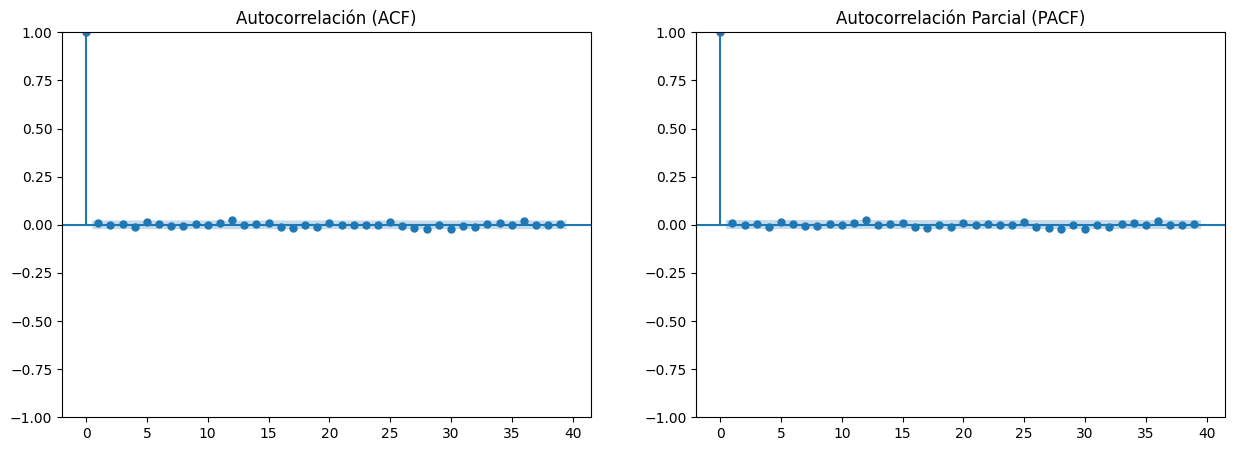

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF de la serie diferenciada
fig, axes = plt.subplots(1, 2, figsize=(15,5))

plot_acf(df['Total_Sales'], ax=axes[0])  # ACF
axes[0].set_title("Autocorrelación (ACF)")

plot_pacf(df['Total_Sales'], ax=axes[1])  # PACF
axes[1].set_title("Autocorrelación Parcial (PACF)")

plt.show()


In [33]:
from statsmodels.tsa.arima.model import ARIMA

productos_altos_errores = [1, 2, 8, 11, 12]  # Productos con MAPE > 20%

for product in productos_altos_errores:
    df_product = df[df['Product_ID'] == product].set_index('Order_Date')['Total_Sales']
    
    model = ARIMA(df_product, order=(1,0,1))  # Ajustar según ACF/PACF
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=3)
    print(f'Producto {product} - Predicciones ARIMA:', forecast)


Producto 1 - Predicciones ARIMA: 732    3.167813
733    3.161106
734    3.156332
Name: predicted_mean, dtype: float64
Producto 2 - Predicciones ARIMA: 569    3.405704
570    3.289135
571    3.324947
Name: predicted_mean, dtype: float64
Producto 8 - Predicciones ARIMA: 944    3.528664
945    3.537539
946    3.541358
Name: predicted_mean, dtype: float64
Producto 11 - Predicciones ARIMA: 442    3.696781
443    3.757493
444    3.758952
Name: predicted_mean, dtype: float64
Producto 12 - Predicciones ARIMA: 133    3.799868
134    3.818338
135    3.828259
Name: predicted_mean, dtype: float64


In [34]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['year'] = df['Order_Date'].dt.year
df['month'] = df['Order_Date'].dt.month

# Crear una tabla con ventas agregadas por producto y mes
df_monthly = df.groupby(['Product_ID', 'year', 'month'])['Total_Sales'].sum().reset_index()

# Crear variables de retraso (lag) para ventas pasadas
df_monthly['ventas_t-1'] = df_monthly.groupby('Product_ID')['Total_Sales'].shift(1)
df_monthly['ventas_t-2'] = df_monthly.groupby('Product_ID')['Total_Sales'].shift(2)
df_monthly['ventas_t-3'] = df_monthly.groupby('Product_ID')['Total_Sales'].shift(3)

# Eliminar filas con NaN (los primeros meses no tienen datos previos suficientes)
df_monthly = df_monthly.dropna()

# Definir variables de entrada (X) y salida (y)
X = df_monthly[['Product_ID', 'ventas_t-1', 'ventas_t-2', 'ventas_t-3']]
y = df_monthly['Total_Sales']

In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE XGBoost: {mae:.2f}')

MAE XGBoost: 54.66


In [39]:
future_predictions = []

for product in df['Product_ID'].unique():
    last_sales = df_monthly[df_monthly['Product_ID'] == product].iloc[-3:]['Total_Sales'].values.tolist()

    for i in range(3):  # Predecir los próximos 3 meses
        X_new = np.array([[product, last_sales[-1], last_sales[-2], last_sales[-3]]])  # Crear entrada
        y_pred = model.predict(X_new)[0]  # Predecir con XGBoost
        future_predictions.append([product, y_pred])
        
        # Actualizar ventas pasadas para la siguiente predicción
        last_sales.append(y_pred)
        last_sales.pop(0)  # Elimina el dato más viejo

# Convertir predicciones a DataFrame
future_df = pd.DataFrame(future_predictions, columns=['Product_ID', 'Predicted_Sales'])
future_df

,Product_ID,Predicted_Sales
0,0,296.622711
1,0,247.461792
2,0,133.571747
3,1,119.070557
4,1,40.055473
5,1,32.011204
6,2,147.907211
7,2,29.878418
8,2,99.652115
9,3,133.029938
